### 1. What is a neural network? What are the general steps required to build a neural network? 

A neural network is machine learning made up of at least three layers: the input layer, a hidden layer, and the output layer.  A neural network containing more than one hidden layer is said to be performing "deep learning".  The neural network takes the values from the input layer, and applies specified weights to them, and then calculates the results of their interactions with each other.  This calculation of weights and interactions happens at each layer until you reach the output layer, which is actually the prediction.
The general steps to build a neural network are to:
1. Specify the model setup, such as Sequential.
2. Build each layer of the model, beginning with the input layer.  This will specify dense/sparse, number of nodes, activation type (typically 'relu'), and input shape.
3. Hidden layers will each contain all of the specifications of the first layer except for input shape as their input will be the layer preceding.
4. Build the output layer with dense/sparse, number of final answers you are looking for (one if regression, two if binary classification, variable depending on the data if classification other than binary)
5. Compile the model.  Here you specify optimizer, loss function and metric for evaluating performance.
6. Fit the model using at least predictions and target.

### 2. Generally, how do you check the performance of a neural network? Why? 

You can check the performance of your model using validation scores. You can run epochs using optimization methods to determine the point at which you minimize your loss function.  The performance of your model at that point is maximized.

### 3. Create a neural network using keras to predict the outcome of either of these datasets: 
### Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
### Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone

import data

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image

ab_df=pd.read_csv('abalone.data',delimiter=',',header=None)
ab_df.shape

(4177, 9)

rename columns

In [3]:
ab_df.columns=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

remove unnecessary columns

In [4]:
df=ab_df[['sex', 'length', 'diameter', 'height', 'whole_weight', 'rings']]

There are no missing values, so moving on to reviewing/removing outliers

In [5]:
outlier_rem_df=df.copy()
# IQR
Q1 = outlier_rem_df.quantile(0.25)
Q3 = outlier_rem_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
mod_df_out = outlier_rem_df[~((outlier_rem_df < (Q1 - 2.5 * IQR)) |(outlier_rem_df > (Q3 + 2.5 * IQR))).any(axis=1)]
mod_df_out.shape

length          0.1650
diameter        0.1300
height          0.0500
whole_weight    0.7115
rings           3.0000
dtype: float64


(4081, 6)

In [6]:
mod_df_out['rings'].unique()

array([15,  7,  9, 10,  8, 16, 14, 11, 12, 18, 13,  5,  4,  6, 17,  1,  3,
        2], dtype=int64)

One hot encoding sex column

In [7]:
aba_df=pd.get_dummies(mod_df_out)
aba_df

,length,diameter,height,whole_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,15,0,0,1
1,0.350,0.265,0.090,0.2255,7,0,0,1
2,0.530,0.420,0.135,0.6770,9,1,0,0
3,0.440,0.365,0.125,0.5160,10,0,0,1
4,0.330,0.255,0.080,0.2050,7,0,1,0
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,11,1,0,0
4173,0.590,0.440,0.135,0.9660,10,0,0,1
4174,0.600,0.475,0.205,1.1760,9,0,0,1
4175,0.625,0.485,0.150,1.0945,10,1,0,0


Will standardize values in model setup

Train: 4.441, Test: 4.610


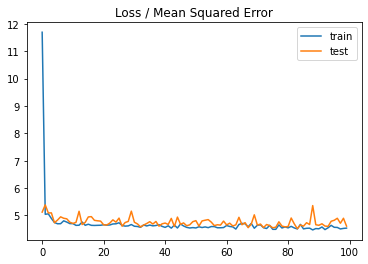

In [8]:
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

X= aba_df.drop('rings', axis=1)
y= aba_df['rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
scaler.fit_transform(X_train, y_train)

# define model
n_cols = X_train.shape[1]
input_shape = (n_cols,)

model = Sequential()
model.add(Dense(50, activation='relu',input_shape=input_shape))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### 5. Write another algorithm to predict the same result using either KNN or logistical regression.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as mse

X= aba_df.drop('rings', axis=1)
y= aba_df['rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print('Accuracy score is: ', knn.score(X_test, y_test))
print('Mean squared error is: ', mse(y_test, y_predicted))

Accuracy score is:  0.21297429620563035
Mean squared error is:  6.965728274173807


### 5. Create a neural network using pytorch to predict the same result as question 3. 


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F 

X= aba_df.drop('rings', axis=1)
y= aba_df['rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# #Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [30]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train)

tensor([[ 0.8417,  0.8321, -0.4758,  ..., -0.6766, -0.6998,  1.3414],
        [ 1.1299,  1.1818,  1.9778,  ..., -0.6766,  1.4290, -0.7455],
        [ 0.7182,  0.5323,  0.5573,  ..., -0.6766, -0.6998,  1.3414],
        ...,
        [-1.2167, -1.2664, -1.2506,  ..., -0.6766,  1.4290, -0.7455],
        [ 1.5827,  1.1318,  1.0739,  ..., -0.6766, -0.6998,  1.3414],
        [-0.5580, -0.3171, -0.3466,  ..., -0.6766, -0.6998,  1.3414]])


In [31]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=7, hidden1=50, hidden2=50, out_features =1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [32]:
torch.manual_seed(42)

model = ANN_Model()

In [35]:
loss_function = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

y_test = y_test.to(torch.float32)

In [45]:
final_loss = []
n_epochs = 2000
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred.float(), y_train.float())
    final_loss.append(loss)
    
    if epoch % 20 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch
    

Epoch number: 1 with loss: 7.7665696144104
Epoch number: 21 with loss: 7.76612663269043
Epoch number: 41 with loss: 7.766013145446777
Epoch number: 61 with loss: 7.766005516052246
Epoch number: 81 with loss: 7.7660040855407715
Epoch number: 101 with loss: 7.7660040855407715
Epoch number: 121 with loss: 7.766005516052246
Epoch number: 141 with loss: 7.769236087799072
Epoch number: 161 with loss: 7.768919944763184
Epoch number: 181 with loss: 7.767259120941162
Epoch number: 201 with loss: 7.766138553619385
Epoch number: 221 with loss: 7.766025066375732
Epoch number: 241 with loss: 7.766005039215088
Epoch number: 261 with loss: 7.766005039215088
Epoch number: 281 with loss: 7.7660040855407715
Epoch number: 301 with loss: 7.7661542892456055
Epoch number: 321 with loss: 7.766026020050049
Epoch number: 341 with loss: 7.766158103942871
Epoch number: 361 with loss: 7.7686686515808105
Epoch number: 381 with loss: 7.7667236328125
Epoch number: 401 with loss: 7.766978740692139
Epoch number: 421 w

### 6. Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

The neural networks performed better.  I believe this is because of the built in methods for optimization of feature weights.